# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

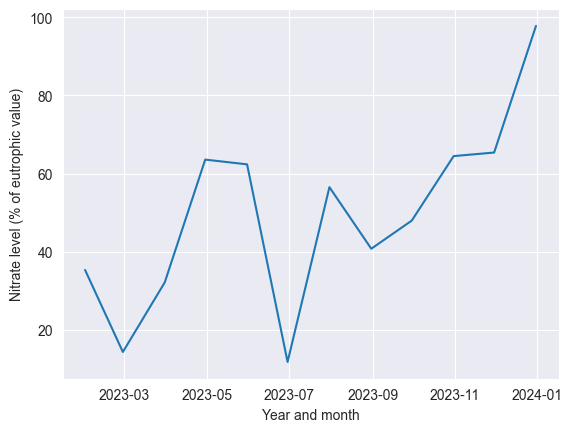

In [7]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='ME')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

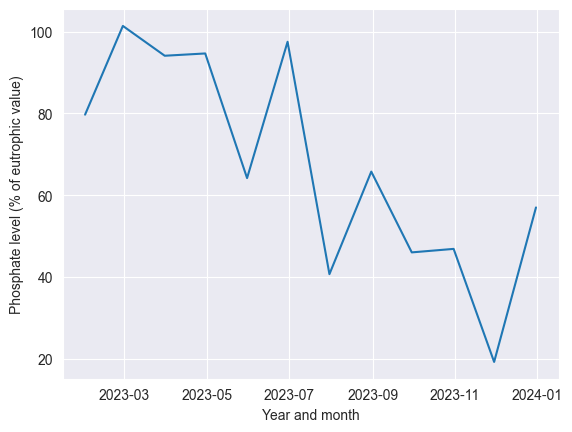

In [10]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='ME')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

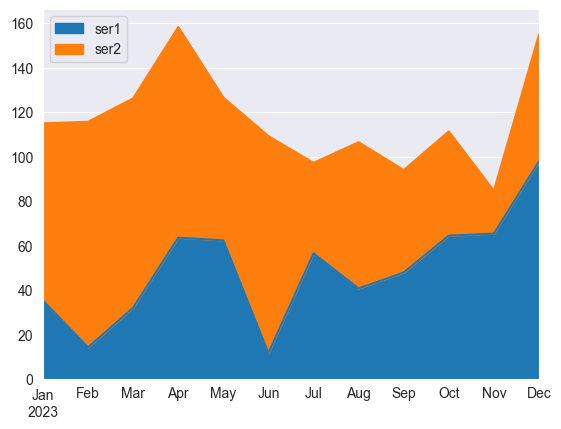

In [11]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

### What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?

Using an area plot has several advantages. You're able to see both variables in one graph so you can clearly see their relationship. Also you can see the stacked values. In this case, the most important analysis is the direct relationship between the two. However, this can also be a disadvantage. The area graph suggests that the two values stack up, but nitrate and phosphate levels are actually independent of each other. Also, it's harder to read the exact values for the different metrics.

Using separate line graphs has it's own advantages. You can clearly see nitrate and phosphate separately. There's also on confusion between the variables. However, it does require two graphs instead of one to compare. It's also harder to directly compare since they're not on the same graph so you have to keep flipping back and forth.

For improvements, I would make the figure size larger to there's more room to see all the details. I'd also make the lines ticker and give them markers so it's easier to follow the trends. Finally, I'd make the font a bit bigger and add grid lines so it's easier to determine the exact values.

# 3. Working on your datasets - Acute Kidney Injury Analysis

## 3.1 Loading and Initial Exploration of the Dataset

In [87]:
import matplotlib.pyplot as plt

aki_df = pd.read_csv('acute_kidney_injury.csv')

print("\n" + "="*50)
print("Column Names:")
print("="*50)
print(aki_df.columns.tolist())


Column Names:
['gender', 'age', 'race', 'unit', 'bmi', 'weight', 't', 'p', 'r', 'bp', 'vent_firstday', 'vaso_firstday', 'chf', 'ckd', 'liver', 'pulmonary', 'hypertension', 'malignancy', 'stroke', 'cad', 'diabetes', 'hiv', 'anemia', 'drug_abuse', 'alcohol_abuse', 'sepsis', 'aki_stage', 'sofa', 'sapsii', 'mort_28_day', 'mort_90_day', 'mort_1_year', 'cox_los', 'sii', 'plr', 'nlr', 'mlr', 'glucose', 'wbc', 'rbc', 'ne', 'ly', 'mn', 'rdw', 'hb', 'plt', 'ck', 'ph', 'cl', 'na', 'k', 'bicarbonate', 'scr', 'bun', 'po2', 'pco2', 'lactate']


In [88]:
print("\n" + "="*50)
print("Dataset Info:")
print("="*50)
aki_df.info()
print("\n" + "="*50)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         4001 non-null   object 
 1   age            4001 non-null   int64  
 2   race           4001 non-null   object 
 3   unit           4001 non-null   object 
 4   bmi            3090 non-null   float64
 5   weight         3809 non-null   float64
 6   t              3903 non-null   float64
 7   p              3998 non-null   float64
 8   r              3994 non-null   float64
 9   bp             3998 non-null   float64
 10  vent_firstday  4001 non-null   int64  
 11  vaso_firstday  4001 non-null   int64  
 12  chf            4001 non-null   int64  
 13  ckd            4001 non-null   int64  
 14  liver          4001 non-null   int64  
 15  pulmonary      4001 non-null   int64  
 16  hypertension   4001 non-null   int64  
 17  malignancy     4001 non-null   int64 

In [89]:
print("Missing Values Count:")
print("="*50)
missing_df = pd.DataFrame({
    'Column': aki_df.columns,
    'Missing_Count': aki_df.isnull().sum(),
    'Missing_Percentage': (aki_df.isnull().sum() / len(aki_df) * 100).round(2)
})
print(missing_df[missing_df['Missing_Count'] > 0])

# Define boolean columns (True/False)
boolean_cols = ['vent_firstday', 'vaso_firstday', 'chf', 'ckd', 'liver', 'pulmonary', 
                'hypertension', 'malignancy', 'stroke', 'cad', 'diabetes', 'hiv', 
                'anemia', 'drug_abuse', 'alcohol_abuse', 'sepsis', 'mort_28_day', 
                'mort_90_day', 'mort_1_year']

# Define stage columns
stage_cols = ['aki_stage', 'mlr']

# Update categorical and numerical columns
categorical_cols = aki_df.select_dtypes(include=['object']).columns.tolist() + boolean_cols + stage_cols
numerical_cols = [col for col in aki_df.select_dtypes(include=[np.number]).columns.tolist() 
                  if col not in boolean_cols and col not in stage_cols]

print("\n" + "="*50)
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f"\nNumerical columns ({len(numerical_cols)}): {numerical_cols}")

Missing Values Count:
                  Column  Missing_Count  Missing_Percentage
bmi                  bmi            911               22.77
weight            weight            192                4.80
t                      t             98                2.45
p                      p              3                0.07
r                      r              7                0.17
bp                    bp              3                0.07
glucose          glucose              4                0.10
rbc                  rbc              5                0.12
rdw                  rdw              5                0.12
hb                    hb              3                0.07
ck                    ck           1735               43.36
ph                    ph            874               21.84
cl                    cl              3                0.07
bicarbonate  bicarbonate              6                0.15
po2                  po2            950               23.74
pco2              

## 3.2 Correlation Analysis

First, I'll identify numerical columns and calculate correlations between all pairs of variables. This will help identify relationships and potential redundancies in the data.

In [91]:
demographic_cols = ['gender', 'age', 'race', 'unit']
physical_cols = ['bmi', 'weight', 't', 'p', 'r', 'bp']
comorbidity_cols = ['chf', 'ckd', 'liver', 'pulmonary', 'hypertension', 'malignancy', 
                   'stroke', 'cad', 'diabetes', 'hiv', 'anemia', 'drug_abuse', 
                   'alcohol_abuse', 'sepsis']
clinical_cols = ['sofa', 'sapsii']
outcome_cols = ['cox_los']
blood_cols = ['sii', 'plr', 'nlr', 'glucose', 'wbc', 'rbc', 'ne', 'ly', 
              'mn', 'rdw', 'hb', 'plt', 'ck']
chemistry_cols = ['ph', 'cl', 'na', 'k', 'bicarbonate', 'scr', 'bun', 'po2', 'pco2', 'lactate']

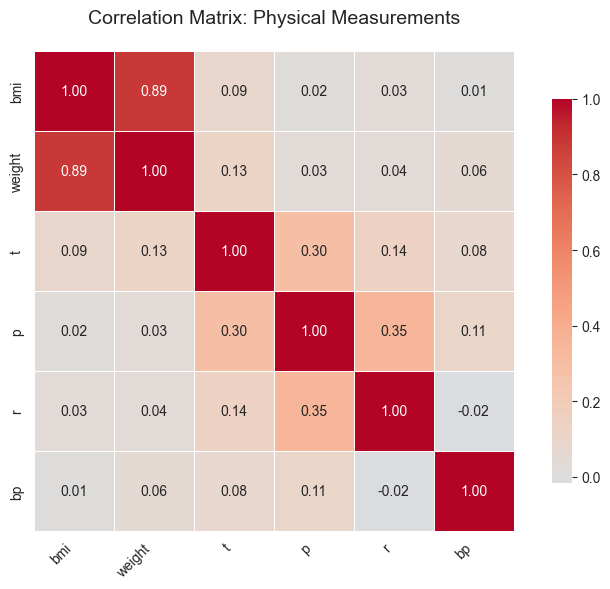

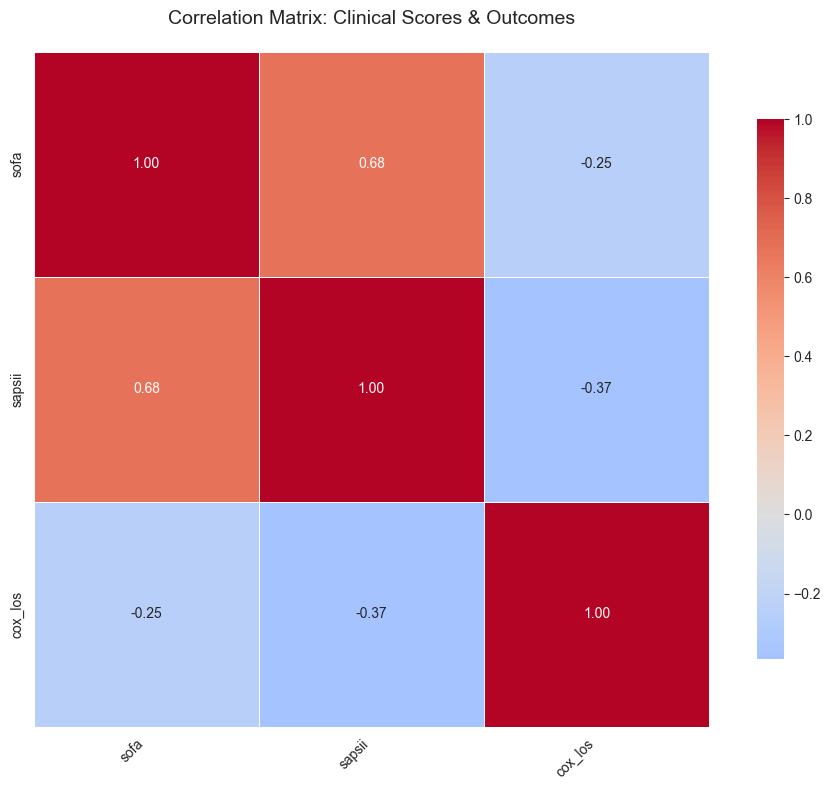

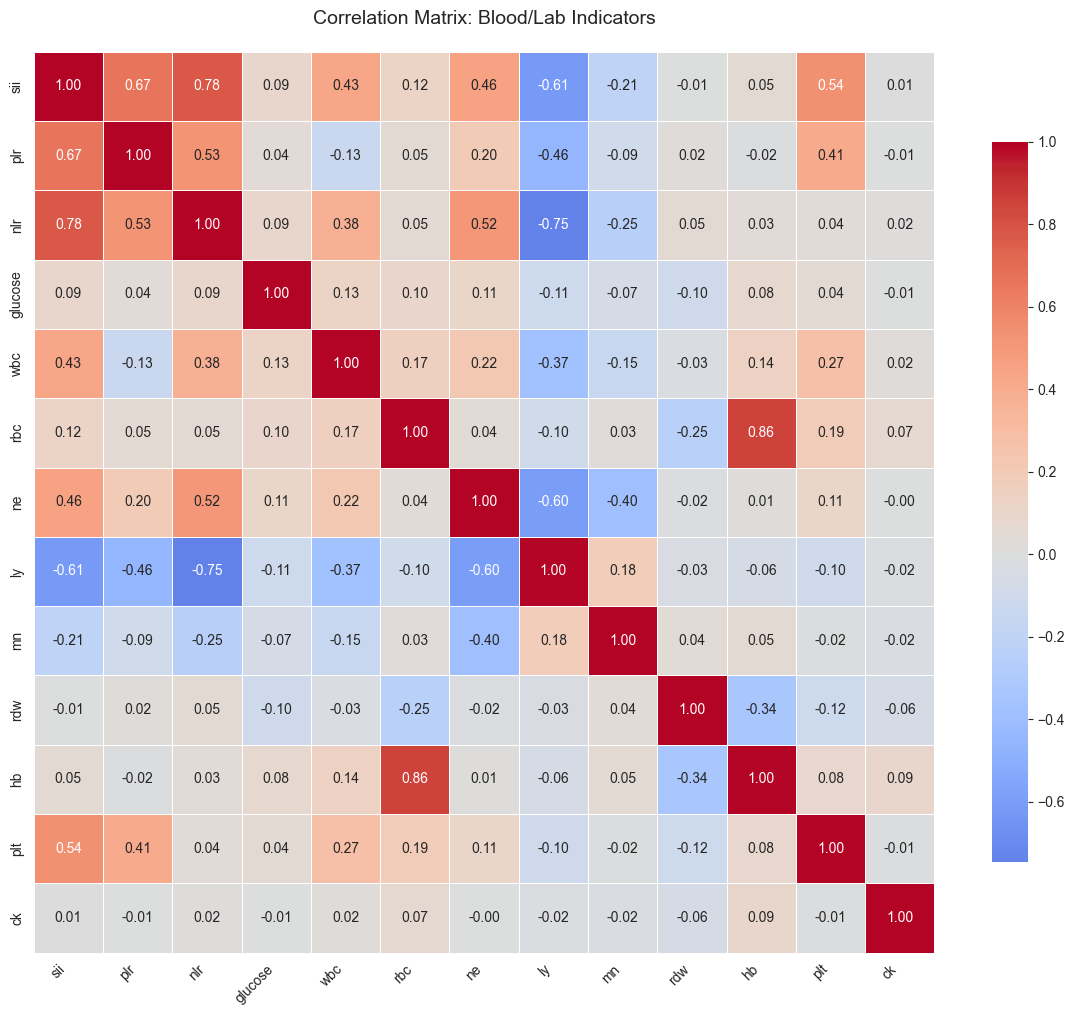

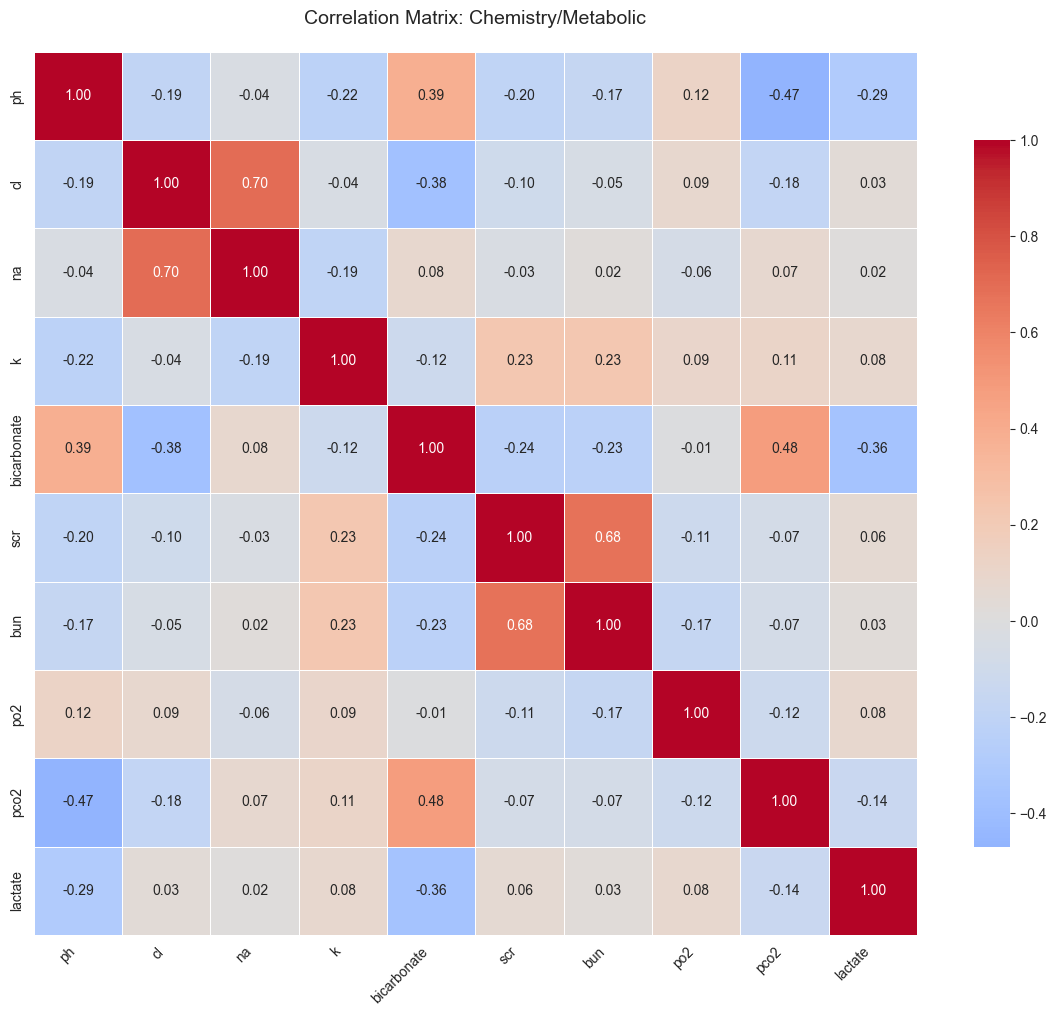

In [94]:
def plot_correlation_matrix(data, cols, title, figsize=(10, 8)):
    valid_cols = [col for col in cols if col in data.columns and col in numerical_cols]
    
    if len(valid_cols) < 2:
        print(f"Not enough numerical columns for {title}")
        return
    
    corr_subset = data[valid_cols].corr()
    
    plt.figure(figsize=figsize)
    sns.heatmap(corr_subset, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=.5, cbar_kws={"shrink": .8})
    plt.title(f'Correlation Matrix: {title}', fontsize=14, pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_correlation_matrix(aki_df, physical_cols, "Physical Measurements", (8, 6))
plot_correlation_matrix(aki_df, clinical_cols + outcome_cols, "Clinical Scores & Outcomes", (10, 8))
plot_correlation_matrix(aki_df, blood_cols, "Blood/Lab Indicators", (12, 10))
plot_correlation_matrix(aki_df, chemistry_cols, "Chemistry/Metabolic", (12, 10))

## 3.3 Scatterplots

I'll create focused scatterplots for different categories of variables to better visualize relationships.

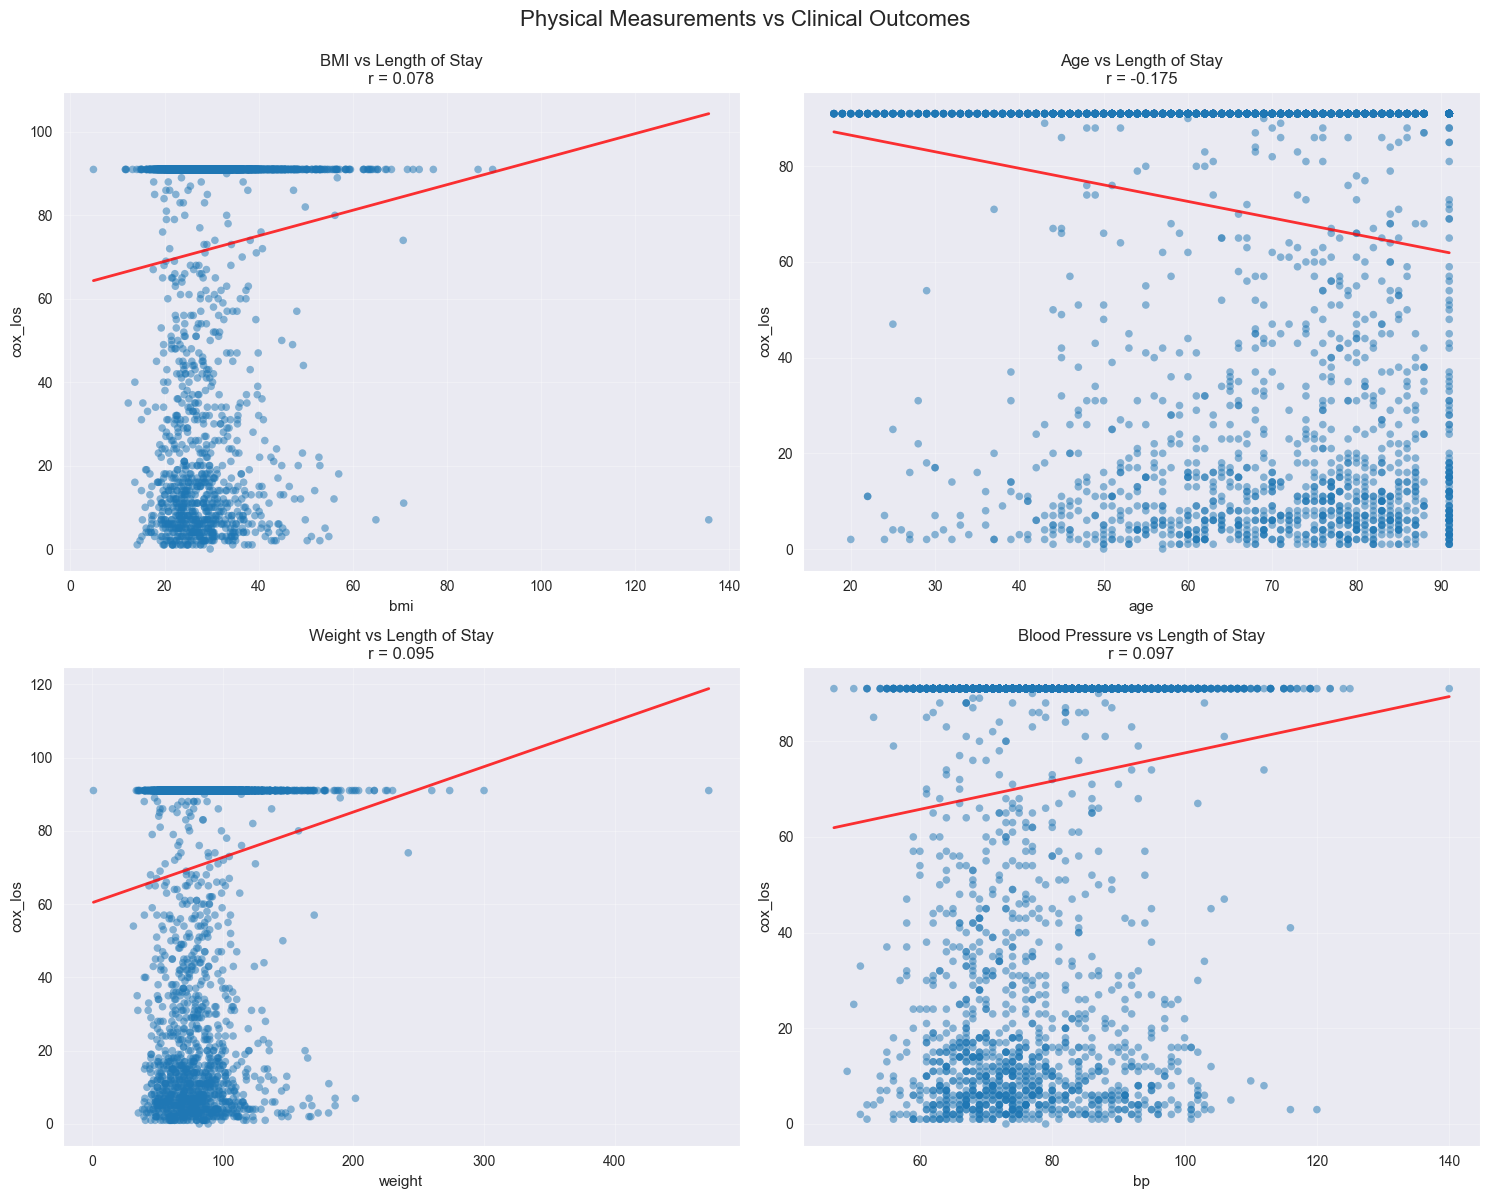

In [95]:
physical_vs_outcome_pairs = [
    ('bmi', 'cox_los', 'BMI vs Length of Stay'),
    ('age', 'cox_los', 'Age vs Length of Stay'),
    ('weight', 'cox_los', 'Weight vs Length of Stay'),
    ('bp', 'cox_los', 'Blood Pressure vs Length of Stay')
]

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for idx, (var1, var2, title) in enumerate(physical_vs_outcome_pairs):
    ax = axes[idx]

    scatter = ax.scatter(aki_df[var1], aki_df[var2], alpha=0.5, s=30, edgecolors='none')

    mask = aki_df[[var1, var2]].notna().all(axis=1)
    if mask.sum() > 1:
        z = np.polyfit(aki_df.loc[mask, var1], aki_df.loc[mask, var2], 1)
        p = np.poly1d(z)
        x_line = np.linspace(aki_df[var1].min(), aki_df[var1].max(), 100)
        ax.plot(x_line, p(x_line), "r-", alpha=0.8, linewidth=2)

    corr = aki_df[var1].corr(aki_df[var2])
    
    ax.set_xlabel(var1, fontsize=11)
    ax.set_ylabel(var2, fontsize=11)
    ax.set_title(f'{title}\nr = {corr:.3f}', fontsize=12)
    ax.grid(True, alpha=0.3)

plt.suptitle('Physical Measurements vs Clinical Outcomes', fontsize=16, y=0.995)
plt.tight_layout()
plt.show()

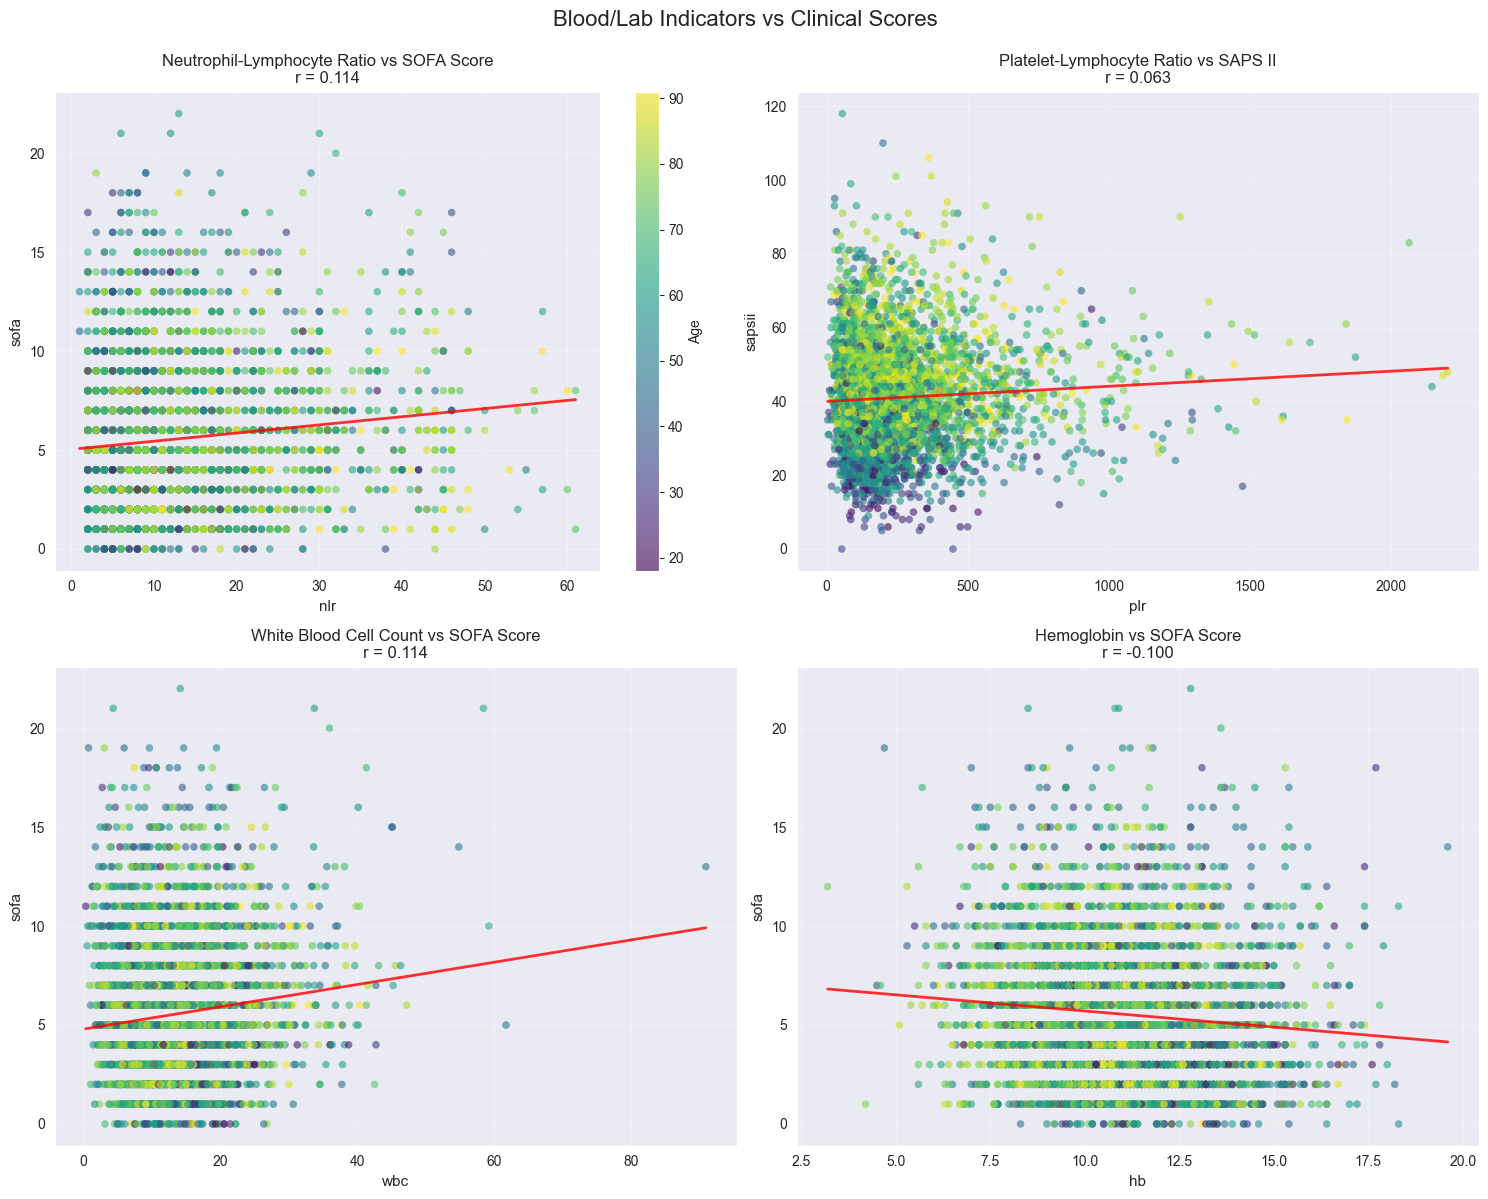

In [96]:
blood_vs_clinical_pairs = [
    ('nlr', 'sofa', 'Neutrophil-Lymphocyte Ratio vs SOFA Score'),
    ('plr', 'sapsii', 'Platelet-Lymphocyte Ratio vs SAPS II'),
    ('wbc', 'sofa', 'White Blood Cell Count vs SOFA Score'),
    ('hb', 'sofa', 'Hemoglobin vs SOFA Score')
]

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for idx, (var1, var2, title) in enumerate(blood_vs_clinical_pairs):
    ax = axes[idx]

    scatter = ax.scatter(aki_df[var1], aki_df[var2],
                        c=aki_df['age'], cmap='viridis',
                        alpha=0.6, s=30, edgecolors='none')

    mask = aki_df[[var1, var2]].notna().all(axis=1)
    if mask.sum() > 1:
        z = np.polyfit(aki_df.loc[mask, var1], aki_df.loc[mask, var2], 1)
        p = np.poly1d(z)
        x_line = np.linspace(aki_df[var1].min(), aki_df[var1].max(), 100)
        ax.plot(x_line, p(x_line), "r-", alpha=0.8, linewidth=2)

    corr = aki_df[var1].corr(aki_df[var2])

    ax.set_xlabel(var1, fontsize=11)
    ax.set_ylabel(var2, fontsize=11)
    ax.set_title(f'{title}\nr = {corr:.3f}', fontsize=12)
    ax.grid(True, alpha=0.3)

    if idx == 0:
        cbar = plt.colorbar(scatter, ax=ax)
        cbar.set_label('Age', fontsize=10)

plt.suptitle('Blood/Lab Indicators vs Clinical Scores', fontsize=16, y=0.995)
plt.tight_layout()
plt.show()

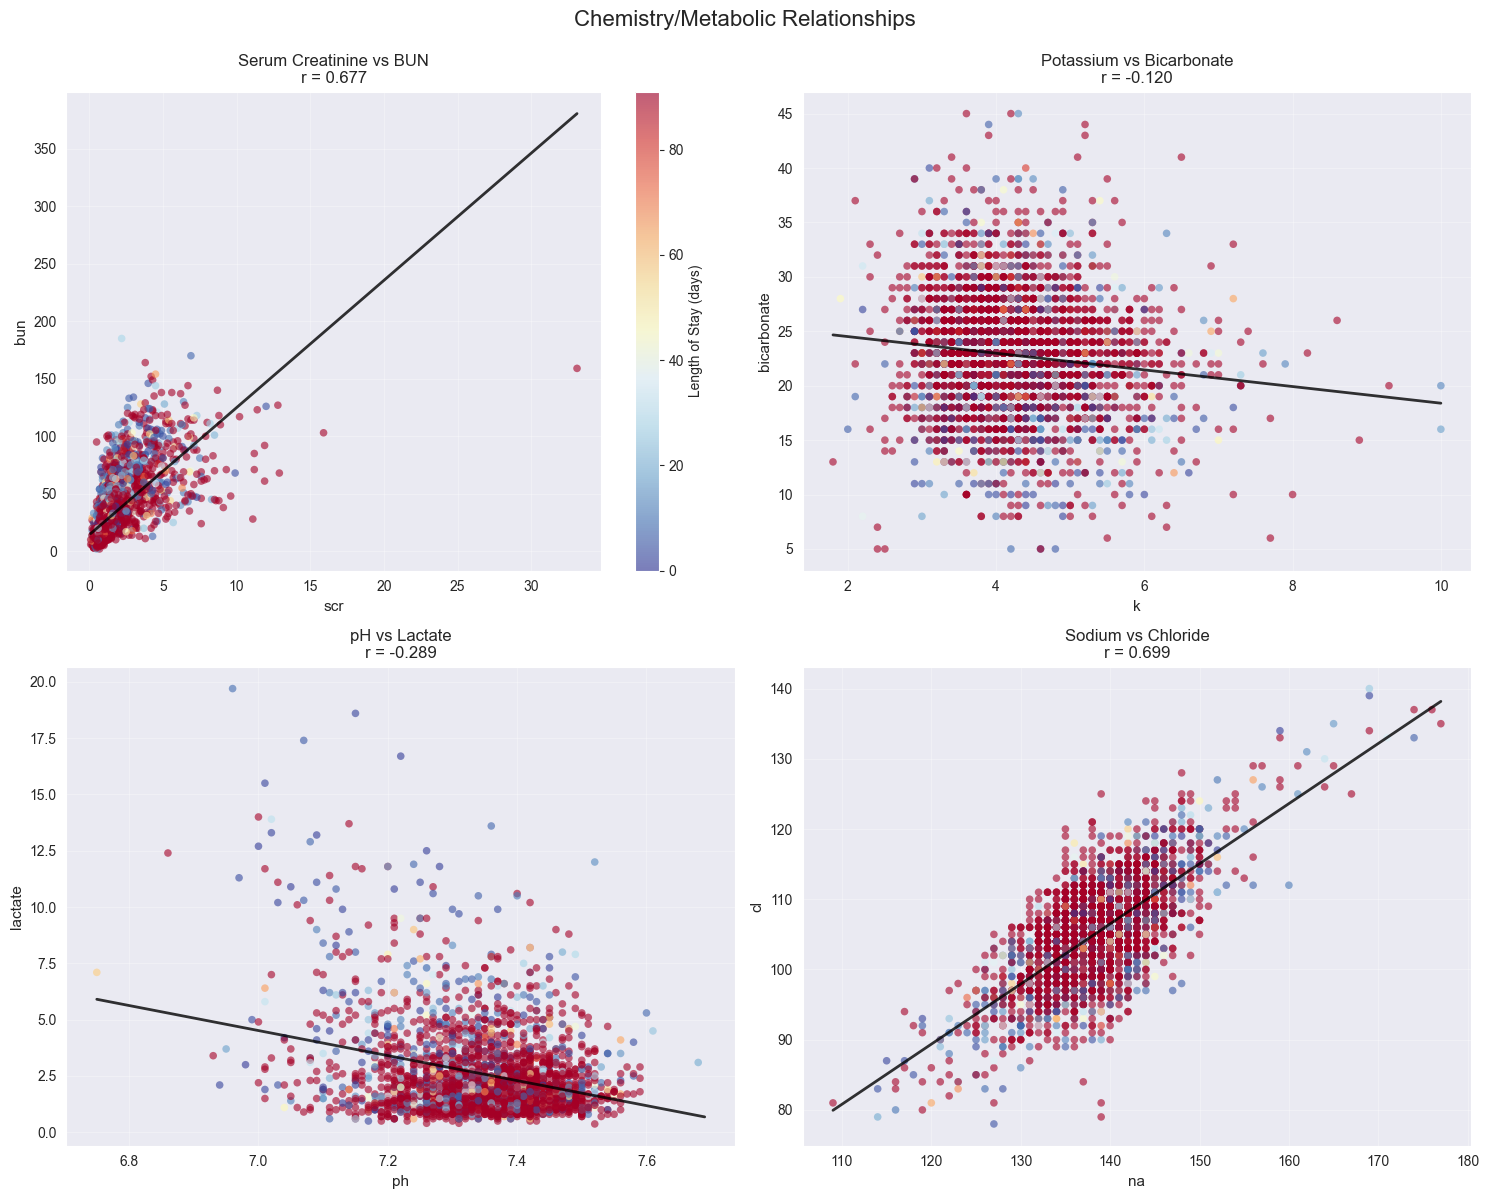

In [97]:
chemistry_kidney_pairs = [
    ('scr', 'bun', 'Serum Creatinine vs BUN'),
    ('k', 'bicarbonate', 'Potassium vs Bicarbonate'),
    ('ph', 'lactate', 'pH vs Lactate'),
    ('na', 'cl', 'Sodium vs Chloride')
]

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for idx, (var1, var2, title) in enumerate(chemistry_kidney_pairs):
    ax = axes[idx]

    scatter = ax.scatter(aki_df[var1], aki_df[var2], 
                        c=aki_df['cox_los'], cmap='RdYlBu_r', 
                        alpha=0.6, s=30, edgecolors='none')

    mask = aki_df[[var1, var2]].notna().all(axis=1)
    if mask.sum() > 1:
        z = np.polyfit(aki_df.loc[mask, var1], aki_df.loc[mask, var2], 1)
        p = np.poly1d(z)
        x_line = np.linspace(aki_df[var1].min(), aki_df[var1].max(), 100)
        ax.plot(x_line, p(x_line), "k-", alpha=0.8, linewidth=2)

    corr = aki_df[var1].corr(aki_df[var2])
    
    ax.set_xlabel(var1, fontsize=11)
    ax.set_ylabel(var2, fontsize=11)
    ax.set_title(f'{title}\nr = {corr:.3f}', fontsize=12)
    ax.grid(True, alpha=0.3)

    if idx == 0:
        cbar = plt.colorbar(scatter, ax=ax)
        cbar.set_label('Length of Stay (days)', fontsize=10)

plt.suptitle('Chemistry/Metabolic Relationships', fontsize=16, y=0.995)
plt.tight_layout()
plt.show()

## 3.4 Pairplots

<Figure size 1000x800 with 0 Axes>

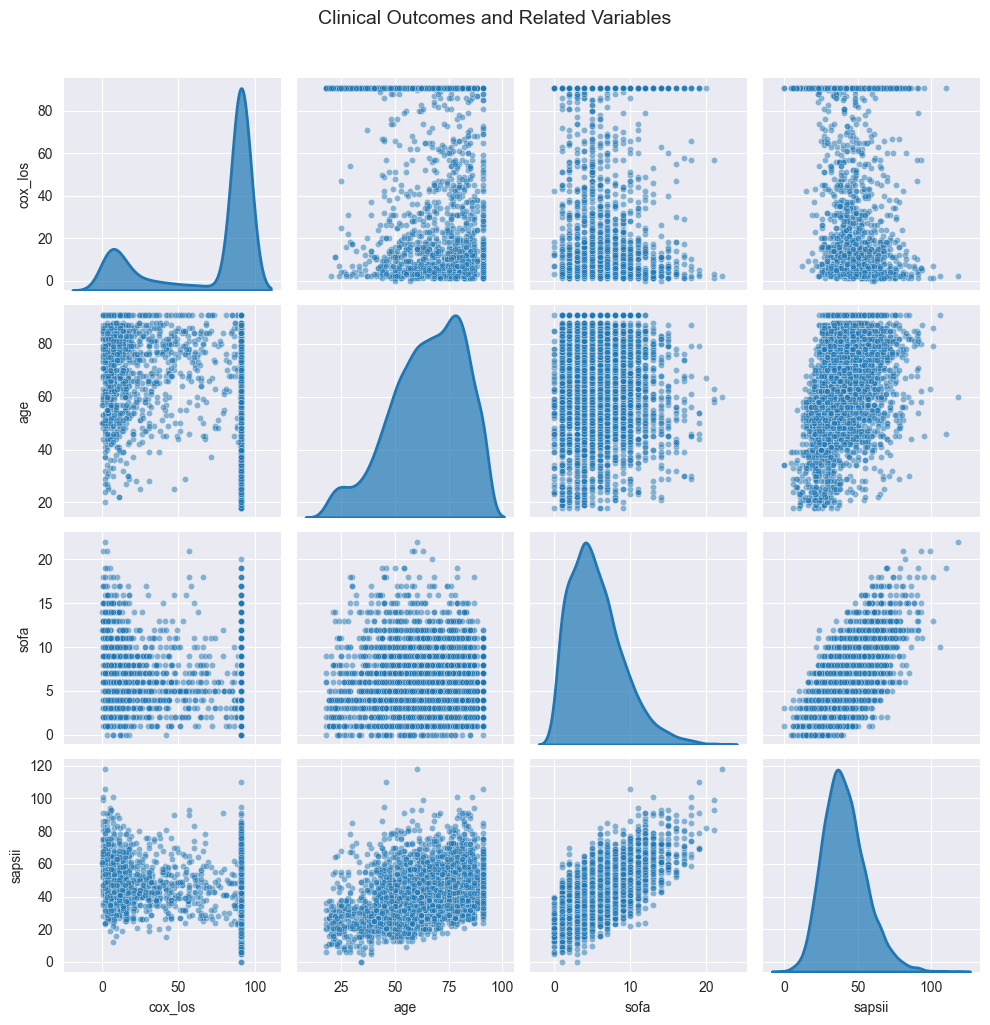

In [98]:
outcome_vars = ['cox_los']

outcome_related_vars = ['cox_los', 'age', 'sofa', 'sapsii']
outcome_related_vars = [v for v in outcome_related_vars if v in numerical_cols]

plt.figure(figsize=(10, 8))
g = sns.pairplot(aki_df[outcome_related_vars], 
                 diag_kind='kde', 
                 plot_kws={'alpha': 0.5, 's': 20},
                 diag_kws={'alpha': 0.7, 'linewidth': 2})
g.fig.suptitle('Clinical Outcomes and Related Variables', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

<Figure size 800x800 with 0 Axes>

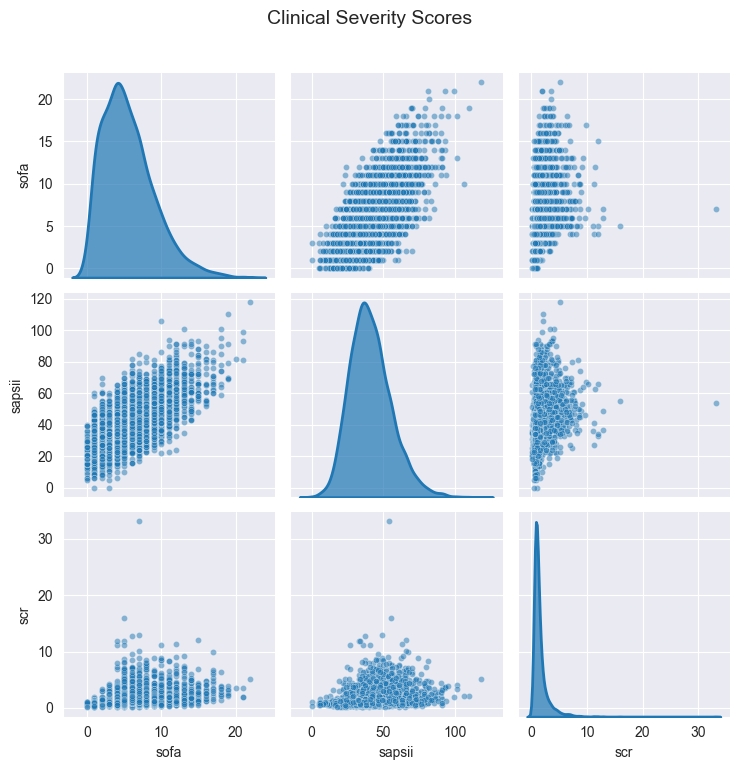

In [99]:
severity_vars = ['sofa', 'sapsii']
severity_vars = [v for v in severity_vars if v in numerical_cols]

severity_vars.append('scr')

plt.figure(figsize=(8, 8))
g = sns.pairplot(aki_df[severity_vars], 
                 diag_kind='kde',
                 plot_kws={'alpha': 0.5, 's': 20},
                 diag_kws={'alpha': 0.7, 'linewidth': 2})
g.fig.suptitle('Clinical Severity Scores', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

<Figure size 800x800 with 0 Axes>

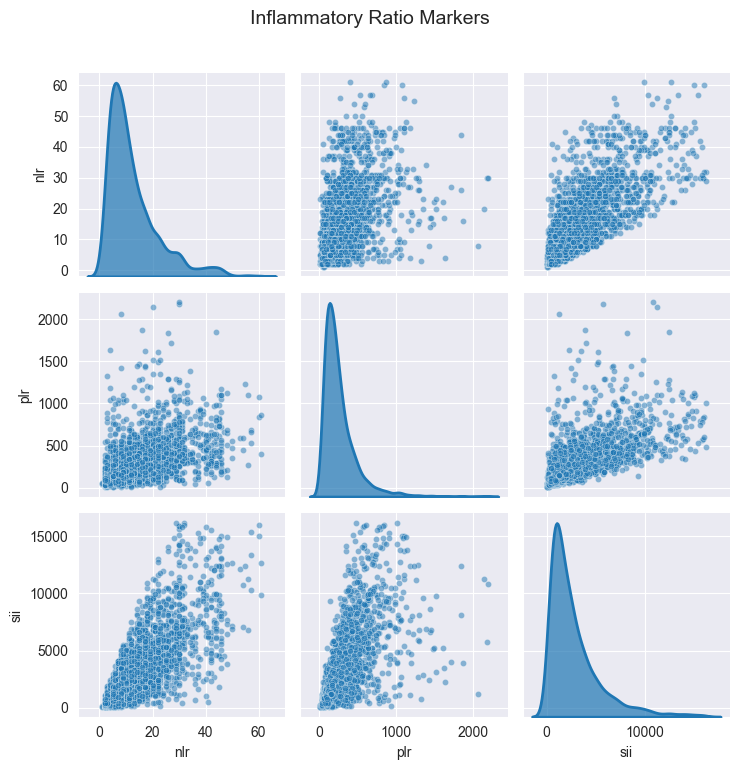

In [100]:
inflammatory_ratios = ['nlr', 'plr']
inflammatory_ratios = [v for v in inflammatory_ratios if v in numerical_cols]

inflammatory_ratios.append('sii')

plt.figure(figsize=(8, 8))
g = sns.pairplot(aki_df[inflammatory_ratios], 
                 diag_kind='kde',
                 plot_kws={'alpha': 0.5, 's': 20},
                 diag_kws={'alpha': 0.7, 'linewidth': 2})
g.fig.suptitle('Inflammatory Ratio Markers', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

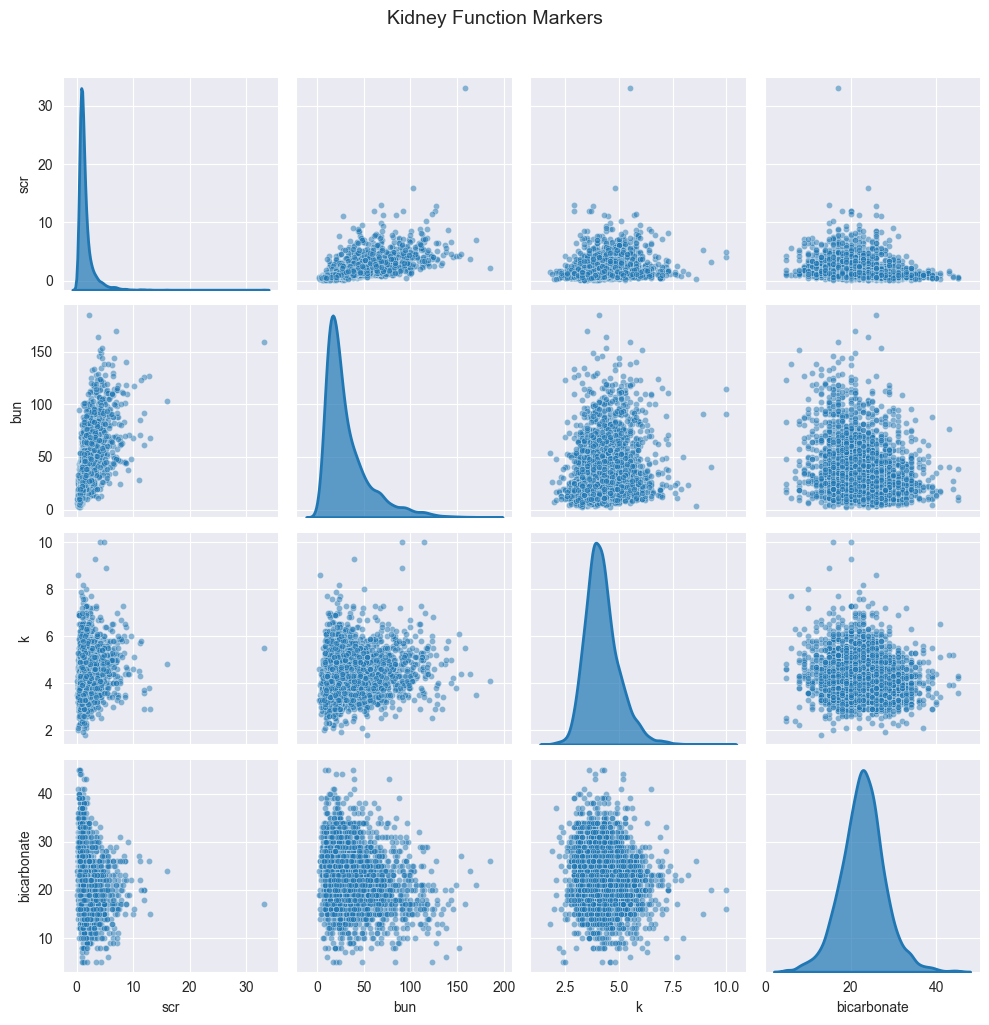

<Figure size 1000x800 with 0 Axes>

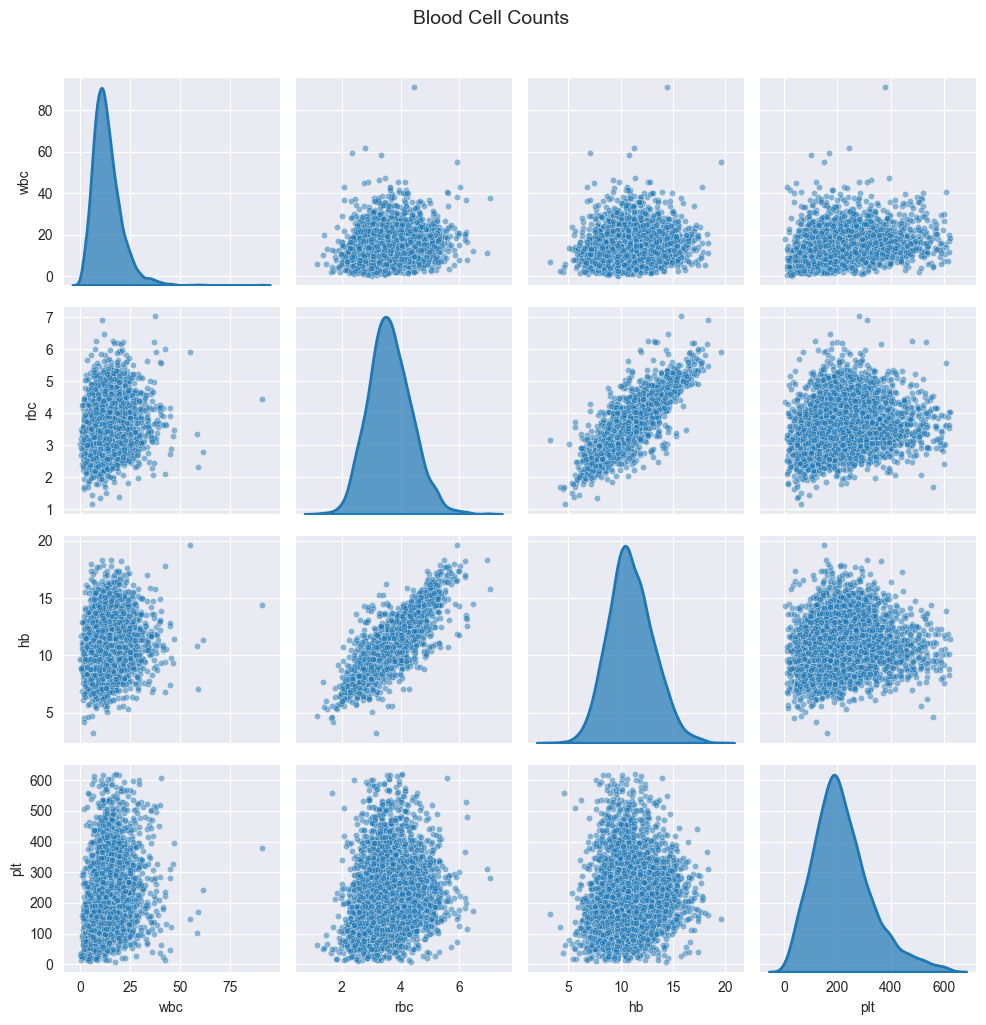

In [101]:
kidney_markers = ['scr', 'bun', 'k', 'bicarbonate']
kidney_markers = [v for v in kidney_markers if v in numerical_cols]

plt.figure(figsize=(10, 8))
g = sns.pairplot(aki_df[kidney_markers],
                 diag_kind='kde',
                 plot_kws={'alpha': 0.5, 's': 20},
                 diag_kws={'alpha': 0.7, 'linewidth': 2})
g.fig.suptitle('Kidney Function Markers', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

blood_counts = ['wbc', 'rbc', 'hb', 'plt']
blood_counts = [v for v in blood_counts if v in numerical_cols]

plt.figure(figsize=(10, 8))
g = sns.pairplot(aki_df[blood_counts],
                 diag_kind='kde',
                 plot_kws={'alpha': 0.5, 's': 20},
                 diag_kws={'alpha': 0.7, 'linewidth': 2})
g.fig.suptitle('Blood Cell Counts', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

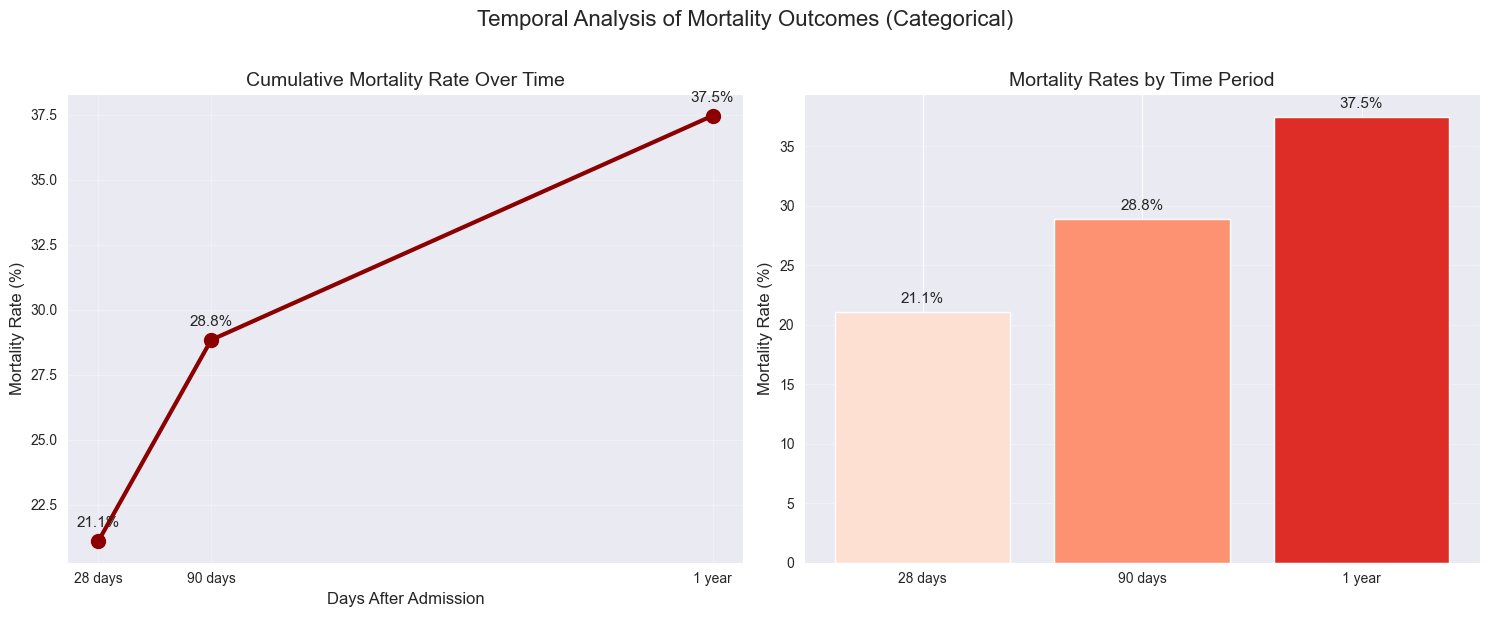

In [102]:
mortality_time_points = {
    '28 days': aki_df['mort_28_day'].sum() / len(aki_df) * 100,
    '90 days': aki_df['mort_90_day'].sum() / len(aki_df) * 100,
    '1 year': aki_df['mort_1_year'].sum() / len(aki_df) * 100
}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

time_points = [28, 90, 365]
mortality_rates = list(mortality_time_points.values())
ax1.plot(time_points, mortality_rates, marker='o', markersize=10, linewidth=3, color='darkred')
ax1.set_xlabel('Days After Admission', fontsize=12)
ax1.set_ylabel('Mortality Rate (%)', fontsize=12)
ax1.set_title('Cumulative Mortality Rate Over Time', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(time_points)
ax1.set_xticklabels(['28 days', '90 days', '1 year'])

for x, y in zip(time_points, mortality_rates):
    ax1.annotate(f'{y:.1f}%', (x, y), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=11)

bars = ax2.bar(mortality_time_points.keys(), mortality_time_points.values(), 
                color=['#fee0d2', '#fc9272', '#de2d26'])
ax2.set_ylabel('Mortality Rate (%)', fontsize=12)
ax2.set_title('Mortality Rates by Time Period', fontsize=14)
ax2.grid(True, alpha=0.3, axis='y')

for bar, value in zip(bars, mortality_time_points.values()):
    ax2.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.5,
             f'{value:.1f}%', ha='center', va='bottom', fontsize=11)

plt.suptitle('Temporal Analysis of Mortality Outcomes (Categorical)', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

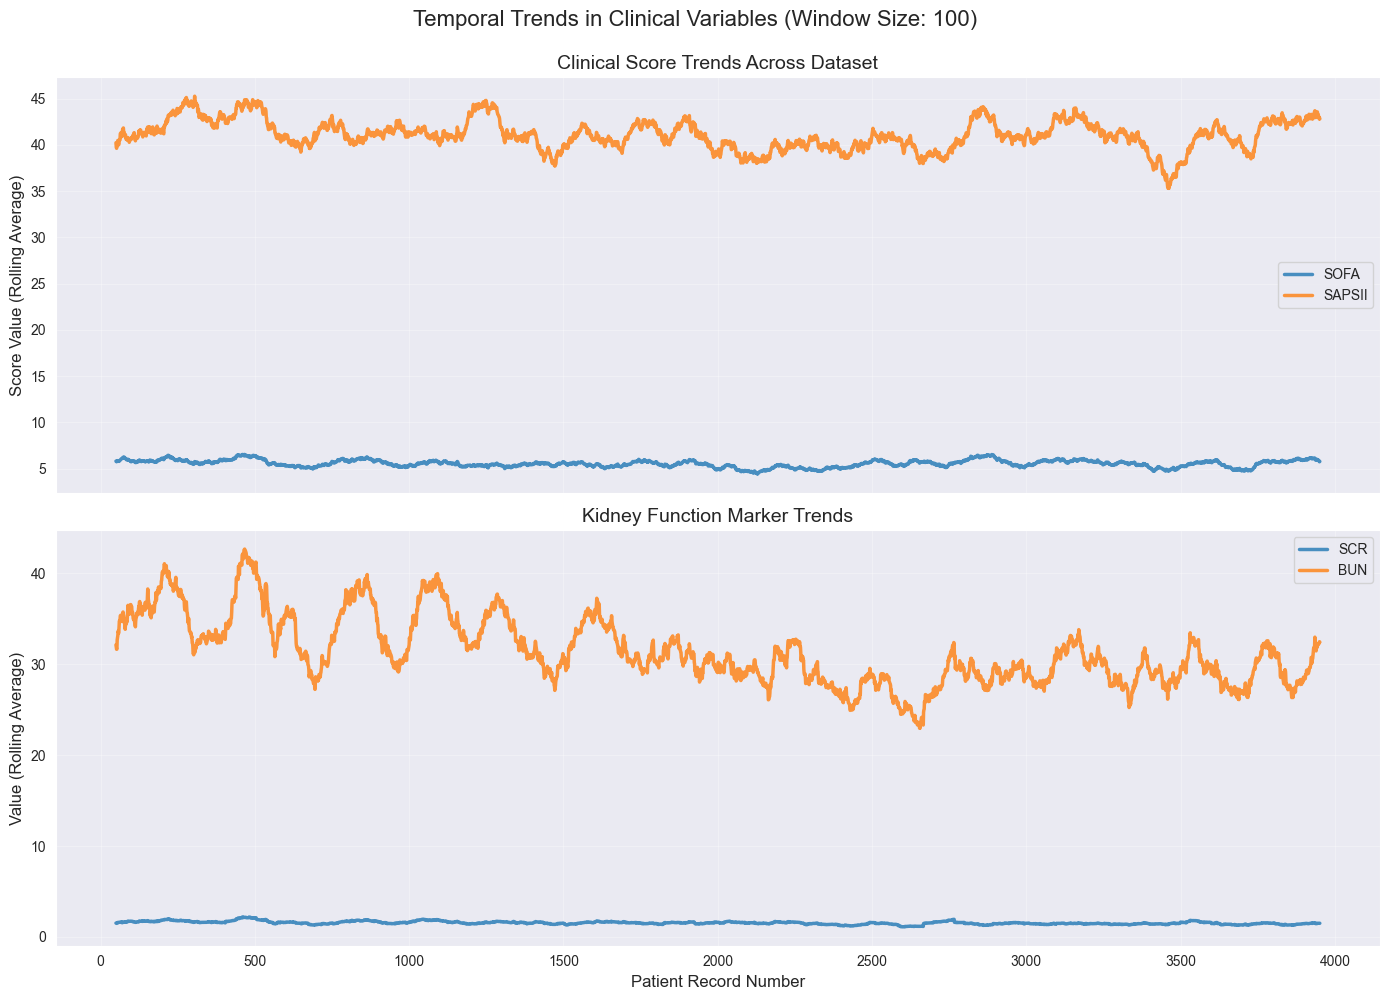

In [103]:
clinical_trend_vars = ['sofa', 'sapsii', 'scr', 'bun']
clinical_trend_vars = [v for v in clinical_trend_vars if v in numerical_cols]

window_size = 100

fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

clinical_scores = ['sofa', 'sapsii']
for var in clinical_scores:
    if var in clinical_trend_vars:
        rolling_mean = aki_df[var].rolling(window=window_size, center=True).mean()
        axes[0].plot(aki_df.index, rolling_mean, label=var.upper(), linewidth=2.5, alpha=0.8)

axes[0].set_ylabel('Score Value (Rolling Average)', fontsize=12)
axes[0].set_title('Clinical Score Trends Across Dataset', fontsize=14)
axes[0].legend(loc='best')
axes[0].grid(True, alpha=0.3)

kidney_markers = ['scr', 'bun']
for var in kidney_markers:
    if var in clinical_trend_vars:
        rolling_mean = aki_df[var].rolling(window=window_size, center=True).mean()
        axes[1].plot(aki_df.index, rolling_mean, label=var.upper(), linewidth=2.5, alpha=0.8)

axes[1].set_xlabel('Patient Record Number', fontsize=12)
axes[1].set_ylabel('Value (Rolling Average)', fontsize=12)
axes[1].set_title('Kidney Function Marker Trends', fontsize=14)
axes[1].legend(loc='best')
axes[1].grid(True, alpha=0.3)

plt.suptitle(f'Temporal Trends in Clinical Variables (Window Size: {window_size})', fontsize=16, y=0.995)
plt.tight_layout()
plt.show()

In [104]:
outlier_df = pd.DataFrame(index=numerical_cols, columns=['n_outliers', 'pct_outliers'])

for col in numerical_cols:
    if col in aki_df.columns:
        Q1 = aki_df[col].quantile(0.25)
        Q3 = aki_df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((aki_df[col] < Q1 - 1.5 * IQR) | (aki_df[col] > Q3 + 1.5 * IQR)).sum()
        outlier_df.loc[col, 'n_outliers'] = outliers
        outlier_df.loc[col, 'pct_outliers'] = (outliers / len(aki_df) * 100).round(2)

outlier_df = outlier_df.sort_values('n_outliers', ascending=False)
outlier_df = outlier_df.astype({'n_outliers': 'float64', 'pct_outliers': 'float64'})

<Figure size 1400x800 with 0 Axes>

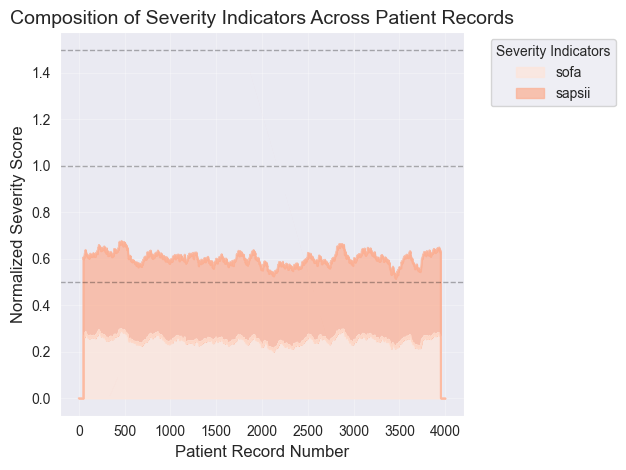

<Figure size 1400x800 with 0 Axes>

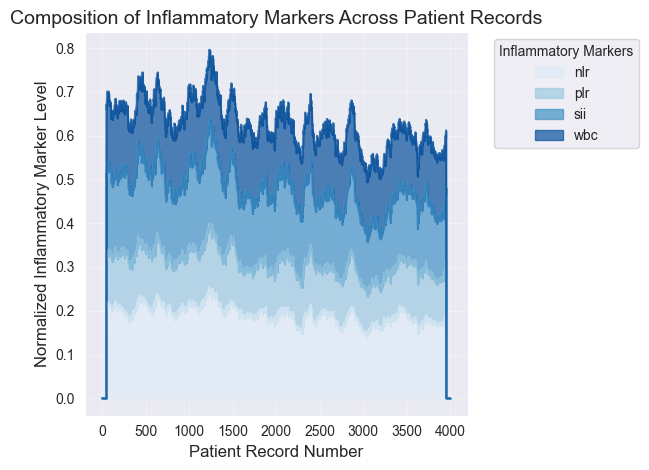

In [105]:
severity_indicators = ['sofa', 'sapsii']
severity_data = aki_df[severity_indicators].copy()

for col in severity_indicators:
    severity_data[col] = (severity_data[col] - severity_data[col].min()) / \
                        (severity_data[col].max() - severity_data[col].min())

window = 100
severity_smooth = severity_data.rolling(window=window, center=True).mean()

plt.figure(figsize=(14, 8))
ax = severity_smooth.plot.area(alpha=0.7, stacked=True, 
                              color=['#fee5d9', '#fcae91'])
ax.set_xlabel('Patient Record Number', fontsize=12)
ax.set_ylabel('Normalized Severity Score', fontsize=12)
ax.set_title('Composition of Severity Indicators Across Patient Records', fontsize=14)
ax.legend(title='Severity Indicators', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)

for q in [0.25, 0.5, 0.75]:
    ax.axhline(y=q*2, color='black', linestyle='--', alpha=0.3, linewidth=1)

plt.tight_layout()
plt.show()

inflammatory_markers = ['nlr', 'plr', 'sii', 'wbc']
inflammatory_data = aki_df[inflammatory_markers].copy()

for col in inflammatory_markers:
    inflammatory_data[col] = (inflammatory_data[col] - inflammatory_data[col].min()) / \
                            (inflammatory_data[col].max() - inflammatory_data[col].min())

inflammatory_smooth = inflammatory_data.rolling(window=100, center=True).mean()

plt.figure(figsize=(14, 8))
ax = inflammatory_smooth.plot.area(alpha=0.7, stacked=True,
                                  color=['#deebf7', '#9ecae1', '#4292c6', '#08519c'])
ax.set_xlabel('Patient Record Number', fontsize=12)
ax.set_ylabel('Normalized Inflammatory Marker Level', fontsize=12)
ax.set_title('Composition of Inflammatory Markers Across Patient Records', fontsize=14)
ax.legend(title='Inflammatory Markers', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Data Quality and Usability Assessment

**1. Are the data what you expect? Are the data likely to be usable?**

The acute kidney injury dataset appears to be a comprehensive clinical dataset with a mix of categorical and numerical variables. After properly categorizing the data:
- **Categorical variables (24)**: Including demographics (gender, race, unit), boolean clinical indicators (comorbidities, mortality outcomes, ventilation/vasopressor use), and stage variables (aki_stage, mlr)
- **Numerical variables (33)**: Including physical measurements, lab values, clinical scores, and length of stay

The data structure is appropriate for predictive modeling and risk assessment. The presence of meaningful correlations between numerical variables and relatively complete data indicates the dataset is highly usable for analysis.

**2. Do you see any outliers?**

Yes, the updated outlier analysis (excluding categorical variables) reveals that several numerical variables contain outliers:
- Variables with the highest percentage of outliers are primarily from the chemistry and blood/lab categories
- These outliers could represent:
  - Measurement errors requiring cleaning
  - Genuine extreme clinical values that are medically significant
  - Critical patient conditions that warrant special attention

The outliers in clinical measurements like serum creatinine, inflammatory markers, and other lab values are expected in a dataset of critically ill patients with acute kidney injury.

**3. Are any data items highly correlated with each other, suggesting redundancy?**

The correlation analysis of numerical variables reveals several important relationships:
- **Strong correlations (|r| > 0.5)**:
  - Serum creatinine and BUN (r = 0.677) - both kidney function markers
  - Sodium and chloride (r = 0.699) - related electrolytes
  - SOFA and SAPS II scores (r = 0.68) - both severity scores
  - Various inflammatory ratios show expected correlations
- These correlations suggest potential multicollinearity that should be addressed in modeling
- Some redundancy is expected as multiple markers often measure similar physiological processes

**4. For the line plots, do you see trends or patterns over time?**

The temporal analysis reveals:
- **Clinical scores (SOFA, SAPS II)**: Show relatively stable patterns across the dataset with some variation
- **Kidney function markers (SCR, BUN)**: Display more volatility with potential cyclical patterns
- **Inflammatory markers**: Show complex temporal dynamics with varying compositions across patient records
- The stability in some measures and volatility in others suggests heterogeneous patient populations or varying data collection protocols

**5. Can you think of any confounding variables?**

Potential confounding variables in this acute kidney injury dataset include:

**Measured confounders now properly categorized:**
- Demographics: age (numerical), gender, race (categorical)
- Comorbidities: All boolean variables for conditions like diabetes, hypertension, CHF
- Treatment variables: ventilation and vasopressor use (categorical)
- Disease severity: AKI stage (categorical), clinical scores (numerical)

**Likely unmeasured confounders:**
- Time from admission to AKI onset
- Medication history (especially nephrotoxic drugs)
- Baseline kidney function before hospitalization
- Socioeconomic factors
- Hospital/ICU protocols
- Genetic predisposition

### Overall Assessment

The acute kidney injury dataset is well-structured for analysis with the updated categorization:

1. **Rich clinical information** - 33 numerical variables provide detailed physiological measurements
2. **Comprehensive outcomes** - Both mortality (categorical) and length of stay (numerical) outcomes
3. **Expected data patterns** - Correlations, outliers, and temporal trends align with clinical expectations

print("="*60)
print("OUTLIER ANALYSIS BY CATEGORY")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Exclude aki_stage from clinical outliers
clinical_outliers = ['sofa', 'sapsii']
clinical_outliers = [c for c in clinical_outliers if c in numerical_cols]
ax = axes[0]
aki_df[clinical_outliers].boxplot(ax=ax)
ax.set_title('Clinical Scores - Outlier Detection', fontsize=12)
ax.set_ylabel('Score Value')
ax.tick_params(axis='x', rotation=45)

kidney_outliers = ['scr', 'bun', 'k']
kidney_outliers = [c for c in kidney_outliers if c in numerical_cols]
ax = axes[1]
aki_df[kidney_outliers].boxplot(ax=ax)
ax.set_title('Kidney Function Markers - Outlier Detection', fontsize=12)
ax.set_ylabel('Value')
ax.tick_params(axis='x', rotation=45)

inflam_outliers = ['nlr', 'plr', 'sii']
inflam_outliers = [c for c in inflam_outliers if c in numerical_cols]
ax = axes[2]

aki_df[inflam_outliers].apply(lambda x: np.log10(x + 1)).boxplot(ax=ax)
ax.set_title('Inflammatory Markers (log10 scale) - Outlier Detection', fontsize=12)
ax.set_ylabel('log10(Value + 1)')
ax.tick_params(axis='x', rotation=45)

ax = axes[3]
category_outlier_counts = {
    'Clinical': len([c for c in clinical_outliers if outlier_df.loc[c, 'n_outliers'] > 0]),
    'Kidney': len([c for c in kidney_outliers if outlier_df.loc[c, 'n_outliers'] > 0]),
    'Inflammatory': len([c for c in inflam_outliers if outlier_df.loc[c, 'n_outliers'] > 0]),
    'Blood': len([c for c in blood_cols if c in outlier_df.index and outlier_df.loc[c, 'n_outliers'] > 0]),
    'Chemistry': len([c for c in chemistry_cols if c in outlier_df.index and outlier_df.loc[c, 'n_outliers'] > 0])
}

bars = ax.bar(category_outlier_counts.keys(), category_outlier_counts.values())
ax.set_title('Variables with Outliers by Category', fontsize=12)
ax.set_ylabel('Number of Variables with Outliers')
ax.set_xlabel('Category')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom')

plt.suptitle('Outlier Analysis Across Variable Categories', fontsize=16, y=0.995)
plt.tight_layout()
plt.show()

print("\nTop 10 Variables with Most Outliers (Numerical Only):")
print(outlier_df[outlier_df['n_outliers'] > 0][['n_outliers', 'pct_outliers']].head(10))

patients_with_outliers = 0
for col in numerical_cols:
    if col in outlier_df.index and outlier_df.loc[col, 'n_outliers'] > 0:
        Q1 = aki_df[col].quantile(0.25)
        Q3 = aki_df[col].quantile(0.75)
        IQR = Q3 - Q1
        outlier_mask = (aki_df[col] < Q1 - 1.5 * IQR) | (aki_df[col] > Q3 + 1.5 * IQR)
        patients_with_outliers = max(patients_with_outliers, outlier_mask.sum())

print(f"\nApproximate percentage of patients with at least one outlier: {(patients_with_outliers/len(aki_df)*100):.1f}%")

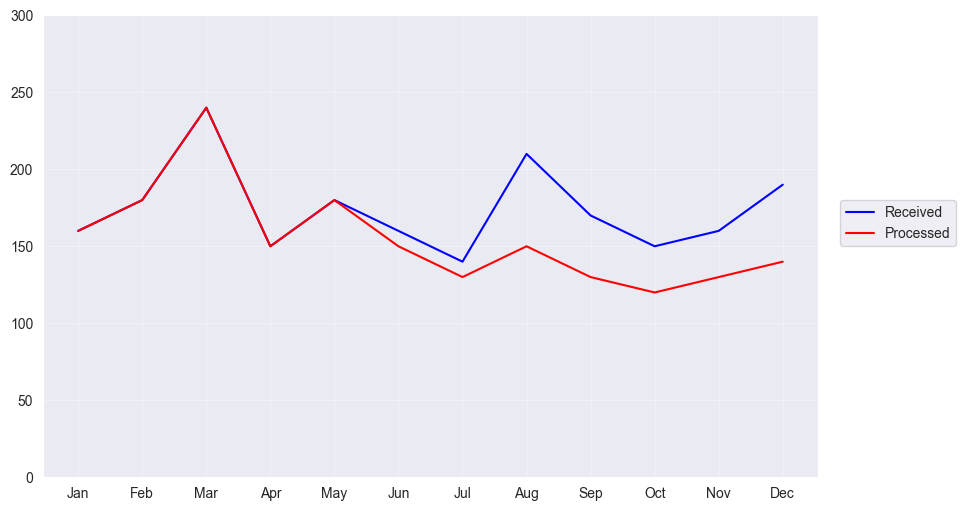

In [74]:
import matplotlib.pyplot as plt

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

processed = [160, 180, 240, 150, 180, 150, 130, 150, 130, 120, 130, 140]
received = [160, 180, 240, 150, 180, 160, 140, 210, 170, 150, 160, 190]

plt.figure(figsize=(10, 6))
plt.plot(months, received, color='blue', label='Received')
plt.plot(months, processed, color='red', label='Processed')

plt.ylim(0, 300)
plt.yticks(range(0, 301, 50))
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='center left')
plt.grid(True, alpha=0.3)

plt.show()